In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_excel('data.xlsx')
df.head()

,ID,Data Criação,Status,Proprietário,Data Fechamento,Atividades Concluídas
0,5049,2017-07-01,Perdido,Daniela Klipp Mannelli,2017-07-24,0
1,10652,2017-12-15,Perdido,Gabriel Brandt,2017-12-16,0
2,70850,2019-10-31,Ganho,Vinicius Furlan,2019-10-31,0
3,70851,2019-10-31,Ganho,Vinicius Furlan,2019-10-31,0
4,34,2017-02-17,Perdido,Fernanda Sawczyn,2017-05-11,2


In [5]:
df.tail()

,ID,Data Criação,Status,Proprietário,Data Fechamento,Atividades Concluídas
41102,101836,2020-05-21,Em aberto,Anderson Azevedo,NaT,0
41103,101839,2020-05-21,Em aberto,Anderson Azevedo,NaT,0
41104,101842,2020-05-21,Em aberto,Hendrik Machado,NaT,0
41105,101844,2020-05-21,Em aberto,Maic Freitas,NaT,0
41106,101845,2020-05-21,Em aberto,Gustavo Camargo,NaT,0


In [6]:
df.shape

(41107, 6)

### 1 - Qual a conversão de vendas no mês de abr/2020?(Para a conversão considere os negócios com status "Ganho"/total de negócios)													


In [7]:
df['Data Fechamento'] = pd.to_datetime(df['Data Fechamento']) 
mask = (df['Data Fechamento'] >= '2020-4-1') & (df['Data Fechamento'] <= '2020-4-30')
subset=df.loc[mask]
subset=subset[subset['Status']=='Ganho'].groupby('Status').count().reset_index()
subset[['Status','ID']]

,Status,ID
0,Ganho,178


### 2 - Em qual mês de 2019 houve o maior número de negócios perdidos?													
													

In [8]:
mask = (df['Data Fechamento'] >= '2019-1-1') & (df['Data Fechamento'] <= '2020-12-31')
subset2=df.loc[mask]
subset2=subset2[subset2['Status']=='Perdido']
subset2=subset2.groupby(pd.Grouper(key='Data Fechamento',freq='M')).count().reset_index()
subset2=subset2.drop(columns=['Atividades Concluídas','Status','Data Criação','Proprietário']).sort_values(by='ID')
subset2.tail(1)
#subset2['Mês'] = subset2['Data Fechamento'].dt.month 
#subset2[['Mês','ID']]

,Data Fechamento,ID
3,2019-04-30,1903


### 3 - Crie um gráfico com o total de vendas(negócios com status "Ganho") mensal dos anos 2019 e 2020, com uma linha de tendência linear.													


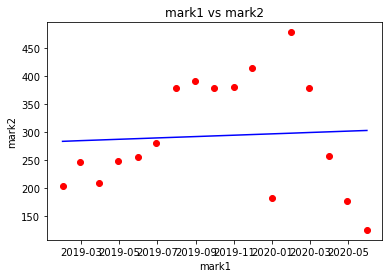

In [9]:
mask = (df['Data Fechamento'] >= '2019-1-1') & (df['Data Fechamento'] <= '2020-12-31')
subset3=df.loc[mask]
subset3=subset3[subset3['Status']=='Ganho']
subset3=subset3.groupby(pd.Grouper(key='Data Fechamento',freq='M')).count().reset_index()
subset3.rename(columns = {'Status':'Vendas'}, inplace = True)

X=np.arange(1,len(subset3.index)+1)
X=X.reshape(len(X),1)
regressor=LinearRegression()
regressor.fit(X,subset3[['Vendas']])
y_pred = regressor.predict(X)

plt.scatter(subset3[['Data Fechamento']], subset3[['Vendas']], color = 'red')
plt.plot(subset3[['Data Fechamento']], y_pred, color = 'blue')
plt.title('mark1 vs mark2')
plt.xlabel('mark1')
plt.ylabel('mark2')
plt.show()

### 4 - Em qual dia da semana ocorreu o maior número de vendas no mês de fev/2020?													


In [10]:
mask = (df['Data Fechamento'] >= '2020-2-1') & (df['Data Fechamento'] <= '2020-2-28')
subset4=df.loc[mask]
subset4=subset4[subset4['Status']=='Ganho']
subset4=subset4.groupby(pd.Grouper(key='Data Fechamento',freq='1d')).count().reset_index()
subset4=subset4[['Data Fechamento','ID']].nlargest(1,['ID'])
subset4

,Data Fechamento,ID
27,2020-02-28,66


In [11]:
subset4['Data Fechamento']=subset4['Data Fechamento'].dt.day_name()
subset4

,Data Fechamento,ID
27,Friday,66


### 5 - Qual o tempo médio em dias do fechamento dos negócios em jan/2020?													

In [12]:
mask = (df['Data Fechamento'] >= '2020-1-1') & (df['Data Fechamento'] <= '2020-1-31') & ((df['Status'] == 'Ganho') | (df['Status'] == 'Perdido'))
subset5=df.loc[mask].sort_values(by='Data Fechamento').reset_index()
totalFechamentos=len(subset5.index)
nroDias=len(subset5['Data Fechamento'].unique())
mediaFechamento=nroDias/totalFechamentos
mediaFechamento
#sumnegocios=subset5['Status'].str.contains(['Ganho', 'Perdido'])


0.0502092050209205

In [13]:
subset5=subset5.groupby('Data Fechamento').count().reset_index()
subset5['cum_sum'] = subset5['ID'].cumsum()

<AxesSubplot:xlabel='Data Fechamento'>

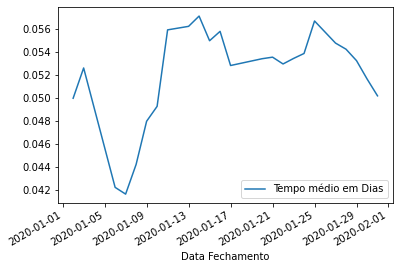

In [14]:
## Moving Average
subset5['count'] = np.arange(1,nroDias+1)
subset5['Tempo médio em Dias']=subset5['count']/subset5['cum_sum']
subset5[['Data Fechamento','Tempo médio em Dias']].plot(x='Data Fechamento',y='Tempo médio em Dias')

### 6 - Qual proprietário possui a maior média de atividades concluídas em 2019?(Considere proprietários com mais de 40 negócios)													


In [15]:
mask = (df['Data Fechamento'] >= '2019-1-1') & (df['Data Fechamento'] <= '2019-12-31') 
mask2 = (df['Status'] == 'Ganho')
subset6=df.loc[mask]

filtroNegocios=subset6.loc[mask2]
filtroNegocios=filtroNegocios.groupby('Proprietário').sum().reset_index()
filtroNegocios=filtroNegocios['Atividades Concluídas']>40

subset6=subset6.groupby('Proprietário').mean().reset_index()
subset6=subset6.drop(columns='ID')
subset6.nlargest(3,columns='Atividades Concluídas')

,Proprietário,Atividades Concluídas
23,Thiago Carvalho,14.000000
20,Rafael Fontana,10.547170
21,Ricardo Gusso,9.027778


### 7 - Crie uma análise estatística da base de dados no ano de 2020 com abertura por mês (Utilize médias, correlação, quartil e mais funções que julgar relevantes)										

In [61]:
mask = (df['Data Criação'] >= '2020-1-1') & (df['Data Criação'] <= '2020-12-31') & (df['Status'] == 'Em aberto')
subset7=df.loc[mask]
#subset7=subset7.drop(columns=['ID','Data Fechamento']).sort_values(by='Data Criação')
subset7.describe()

C:\Users\Lunarti\AppData\Local\Temp/ipykernel_14024/2905249952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset7['Status']=subset['Status']=='Em Aberto'


,ID,Atividades Concluídas
count,1503.000000,1503.000000
mean,97806.805722,4.328011
std,4232.590544,4.591088
min,82197.000000,0.000000
25%,94999.500000,1.000000
50%,99594.000000,3.000000
75%,100908.500000,6.000000
max,101845.000000,46.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1accac5b2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1accac5b9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1accac4bee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1accac65130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1accac654c0>],
 'means': []}

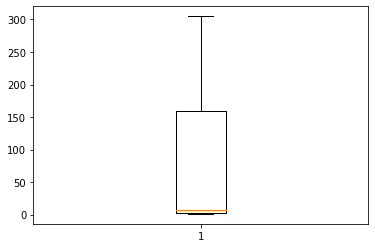

In [58]:
countbyProprietario=subset7.groupby('Proprietário').count()
plt.boxplot(countbyProprietario['Status'])

<AxesSubplot:ylabel='Frequency'>

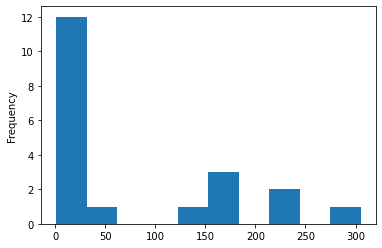

In [56]:
countbyProprietario['Status'].plot.hist()

In [64]:
countbyProprietario.describe()

,ID,Data Criação,Status,Data Fechamento,Atividades Concluídas
count,20.000000,20.000000,20.000000,20.0,20.000000
mean,75.150000,75.150000,75.150000,0.0,75.150000
std,100.075379,100.075379,100.075379,0.0,100.075379
min,1.000000,1.000000,1.000000,0.0,1.000000
25%,2.750000,2.750000,2.750000,0.0,2.750000
50%,7.500000,7.500000,7.500000,0.0,7.500000
75%,158.750000,158.750000,158.750000,0.0,158.750000
max,305.000000,305.000000,305.000000,0.0,305.000000


<AxesSubplot:ylabel='Proprietário'>

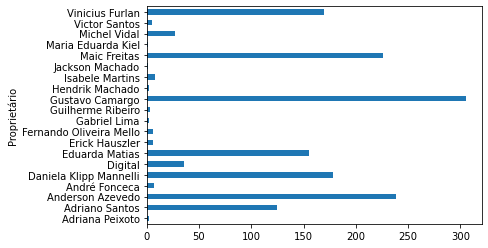

In [55]:
countbyProprietario['Status'].plot.barh()

<AxesSubplot:ylabel='Proprietário'>

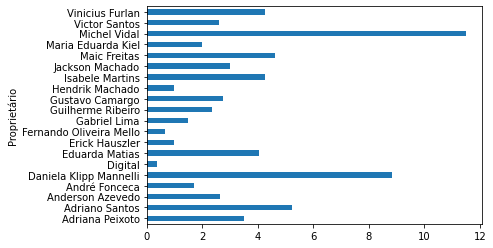

In [68]:
meanbyProprietario=subset7.groupby('Proprietário').mean()
meanbyProprietario['Atividades Concluídas'].plot.barh()

In [69]:
CountMeanCorr=pd.DataFrame()
CountMeanCorr['Count']=countbyProprietario['Status']
CountMeanCorr['Mean']=meanbyProprietario['Atividades Concluídas']
CountMeanCorr.corr()

,Count,Mean
Count,1.000000,0.272328
Mean,0.272328,1.000000


<AxesSubplot:xlabel='Data Criação'>

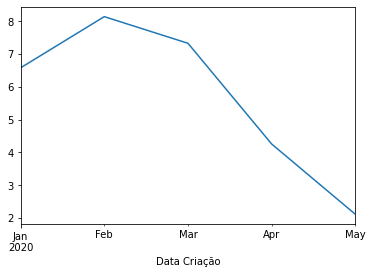

In [ ]:
# Média de Atividades Concluídas por Mês
MeanByMonth=subset7.groupby(pd.Grouper(key='Data Criação',freq='1M')).mean()
MeanByMonth['Atividades Concluídas'].plot.line()

<AxesSubplot:xlabel='Data Criação'>

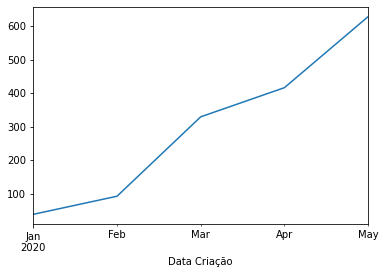

In [21]:
# Total de negócios abertos por Mês
CountByMonth=subset7.groupby(pd.Grouper(key='Data Criação',freq='1M')).count()
CountByMonth['Status'].plot.line()

In [62]:
# Correlação entre média de atividades concluídas por mês e total de negócios abertos por mês
CountMeanCorr=pd.DataFrame()
CountMeanCorr['Count']=CountByMonth['Status']
CountMeanCorr['Mean']=MeanByMonth['Atividades Concluídas']
CountMeanCorr.corr()

,Count,Mean
Count,1.000000,-0.853162
Mean,-0.853162,1.000000


### 8 - Analisando o evolutivo mensal dos negócios do período entre jan/19 e jul/19, qual o índice de correlação apresentado entre o total de negócios e o total de negócios perdidos? A partir desse índice é possível afirmar que há uma relação entre esses dois indicadores? Justifique.		

In [22]:
mask = (df['Data Fechamento'] >= '2019-1-1') & (df['Data Fechamento'] <= '2019-07-31')
subset8=df.loc[mask]

<AxesSubplot:xlabel='Data Fechamento'>

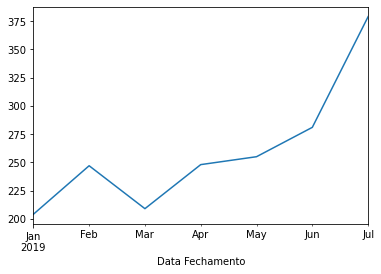

In [23]:
mask2 = (subset8['Status'] == 'Ganho')
ganhos=subset8.loc[mask2].groupby(pd.Grouper(key='Data Fechamento',freq='1M')).count()
ganhos['Status'].plot.line()

<AxesSubplot:xlabel='Data Fechamento'>

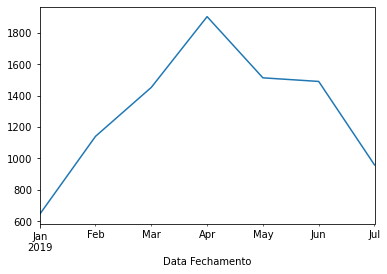

In [24]:
mask3 = (subset8['Status'] == 'Perdido')
perdidos=subset8.loc[mask3].groupby(pd.Grouper(key='Data Fechamento',freq='1M')).count()
perdidos['Status'].plot.line()

In [25]:
ganhoseperdidos=pd.DataFrame()
ganhoseperdidos['Perdidos']=perdidos['Status']
ganhoseperdidos['Ganhos']=ganhos['Status']
ganhoseperdidos.corr()

,Perdidos,Ganhos
Perdidos,1.000000,-0.094604
Ganhos,-0.094604,1.000000


### 9 - Analisando os dados históricos, crie uma projeção do total vendas para o mês de mai/2020. Explique como o cálculo foi realizado e quais parâmetros foram levados em consideração para a criação da projeção.													
													


<AxesSubplot:xlabel='Data Fechamento'>

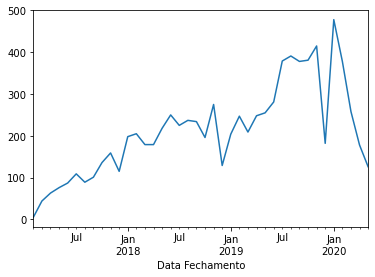

In [27]:
mask2 = (df['Status'] == 'Ganho')
ganhosCount=df.loc[mask2].groupby(pd.Grouper(key='Data Fechamento',freq='1M')).count()
ganhosCount['Status'].plot.line()

In [29]:
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA

In [30]:
model = pm.auto_arima(ganhosCount['Status'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=484.654, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=464.359, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=482.666, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=451.657, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=446.698, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=445.871, Time=0.26 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=447.234, Time=0.27 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=443.903, Time=0.41 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=442.060, Time=0.13 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=440.063, Time=0.10 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=442.059, Time=0.32 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 se

C:\Users\Lunarti\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


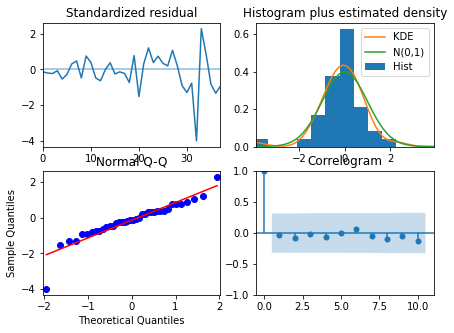

In [31]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [53]:
# Forecast
n_periods = 6
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(ganhosCount['Status']), len(ganhosCount['Status'])+n_periods)

# Series for plot
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

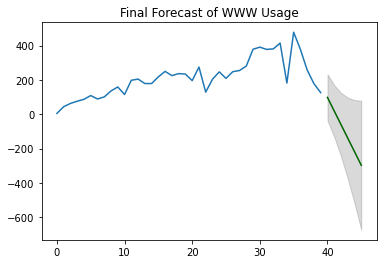

In [54]:
# Plot
plt.plot(ganhosCount['Status'].values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()